In [4]:
from pymatgen.ext.matproj import MPRester
from matplotlib import pyplot as plt
import numpy as np
from pymatgen.electronic_structure.plotter import BSPlotter as bs
with MPRester("AmIEJp5xndflZHbo32t") as m:
    bande = m.get_bandstructure_by_material_id("mp-19")
   

# Bande interdite

Voici la structure des bandes:
{'direct': False, 'energy': 0.1856, 'transition': '(0.333,0.333,0.472)-H'}


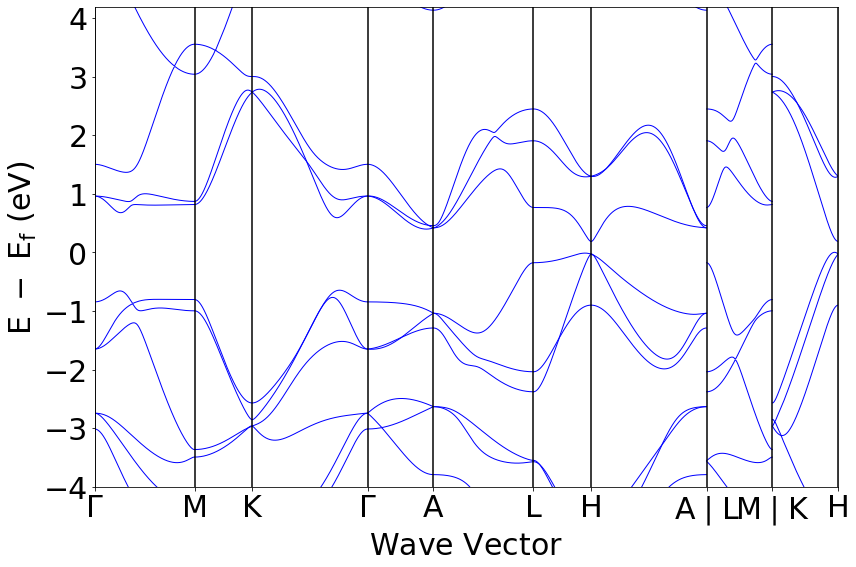

In [218]:
plotter=bs(bande)
print("Voici la structure des bandes:")
plotter.get_plot(zero_to_efermi=True, ylim=None, smooth=True, vbm_cbm_marker=False, smooth_tol=None)
bande_interdite=bande.get_band_gap()
print(bande.get_band_gap())



On a donc une bande interdite de 0.1856 eV avec un gap d'énergie indirect. Il faut une transition de (0.333,0.333,0.472)-H. Comme le gap d'énergie est assez faible, on a donc affaire à un semi-conducteur.

# Dispersion
Il nous faut ensuite déterminer les directions qui présentent le plus et le moins de dispersion. Il nous faut donc déterminer la plus grande différence d'énergie entre chaque bande. Mais il faut tout d'abord déterminer la dernière bande de valence et la première de conduction. On va donc calculer les 

In [217]:
plotter.get_ticks()
def distance():
    ticks=plotter.get_ticks()
    distances=ticks["distance"]
    result=[]
    for index in range(len(distances)-1):
        dis=distances[index+1]-distances[index]
        result.append(dis)
    return result    

In [180]:
energ=plotter.bs_plot_data()
def diff_energy(xieme_band):
    result=[]
    for i in range(len(energ["energy"])):
        
            diff=energ["energy"][i]["1"][xieme_band][len(energ["energy"][i]["1"][xieme_band])-1]-energ["energy"][i]["1"][xieme_band][0]
            #print("ICI J'AI CA :",energ["energy"][i]["1"][xieme_band][len(energ["energy"][i]["1"][xieme_band])-1])
            #print("ET JE RETIRE CA:",energ["energy"][i]["1"][xieme_band][0])
            result.append(diff)
    return result  


On a donc pour la dernière bande de valence un tableau contenant les distances et les différences d'énergie, il faut juste ne pas tenir compte des 0 dans les distances.

In [210]:
def pente(xieme_band):
    energie=diff_energy(xieme_band)
    distances=distance()
    while 0 in distances:
        del distances[distances.index(0)]
    n_zeros = 0
    result=[]
    for i in range(len(energie)):
        result.append(energie[i]/distances[i])
    return result

In [214]:
print("Pentes de la dernière bande de valence:\n",pente(8))
print("\nPentes de la première bande de conduction:\n",pente(9))

Pentes de la dernière bande de valence:
 [0.05021589078943488, -3.8096994684358383, 1.8613612234528565, -0.36622572174827844, 1.0740967211040438, 0.31596419792601826, -1.0881770872107384, -1.1889560640944088, 4.806925519877397]

Pentes de la première bande de conduction:
 [-0.1799298915631355, 4.139476308894141, -1.9139140042413976, -1.026189076650731, 0.4326292129551322, -1.2504757942509226, 0.2505699322196878, 0.09576755307732786, -4.822445162866214]


On a donc pour la dernière bande de valence un maximum de dispersion dans le dernier intervalle, c'est à dire dans la direction K-H, et un minimum dans le premier intervalle, donc dans la direction Γ-M
Pour la première bande de conduction, on a le plus de dispersion dans la direction K-H, et le moins de dispersion dans la direction A|L-M|K
<img src="https://github.com/VictorGenin/lmapr1492/blob/master/dispersion.png?raw=true">